<a href="https://colab.research.google.com/github/alfankevin/praktikum-pcvk/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – Thresholding, Segmentasi Sederhana

### Tugas Praktikum

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

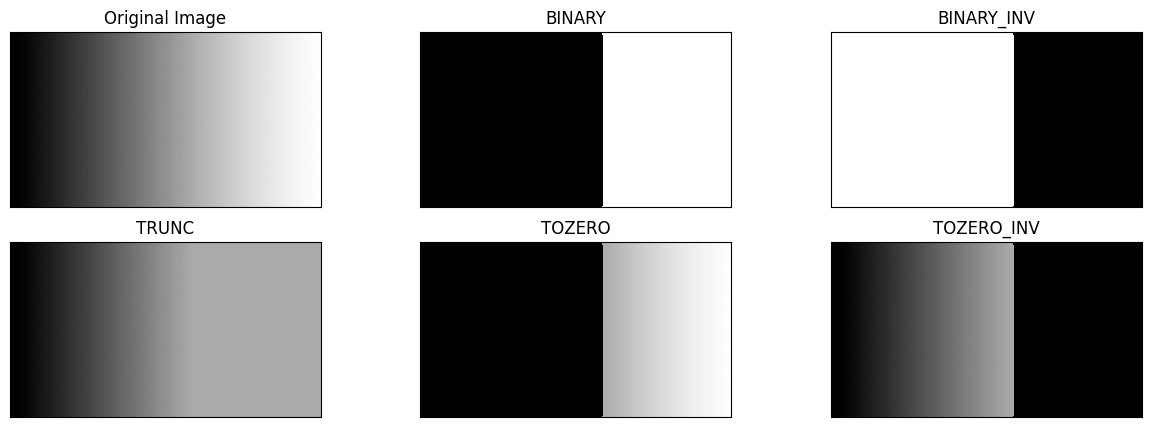

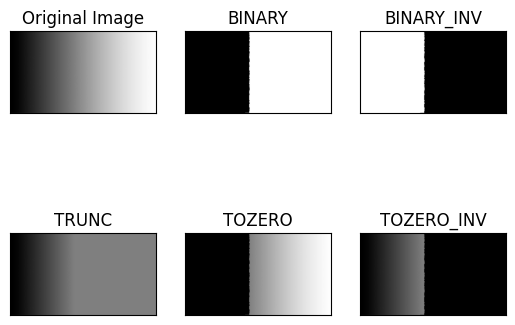

In [11]:
filename_1 = ('/content/drive/MyDrive/thres/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# menggunakan library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s.

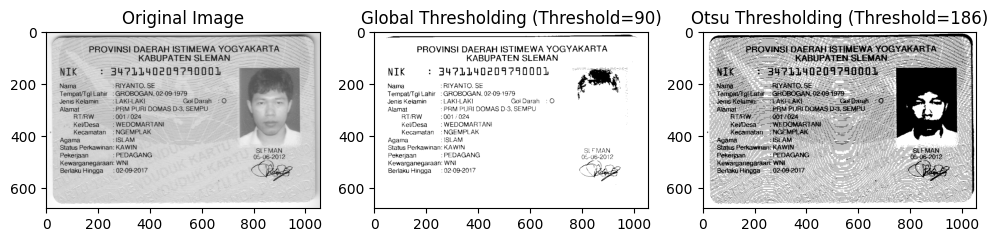

In [12]:
image = cv2.imread('/content/drive/MyDrive/thres/ktp.jpg', cv2.IMREAD_GRAYSCALE)\

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

def otsu_threshold(histogram):
    total_pixels = np.sum(histogram)
    max_var = 0
    threshold = 0

    for t in range(256):
        background_pixels = np.sum(histogram[:t])
        foreground_pixels = np.sum(histogram[t:])

        if background_pixels == 0 or foreground_pixels == 0:
            continue

        background_weight = background_pixels / total_pixels
        foreground_weight = foreground_pixels / total_pixels

        mean_background = np.sum(np.arange(t) * histogram[:t]) / background_pixels
        mean_foreground = np.sum(np.arange(t, 256) * histogram[t:]) / foreground_pixels

        variance_between_classes = background_weight * foreground_weight * (mean_background - mean_foreground) ** 2

        if variance_between_classes > max_var:
            max_var = variance_between_classes
            threshold = t

    return threshold

otsu_thresh = 186
global_thresh = 90

# Apply Otsu's thresholding
otsu_result = (image > otsu_thresh).astype(np.uint8) * 255
global_result = (image > global_thresh).astype(np.uint8) * 255

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(global_result, cmap='gray'), plt.title(f'Global Thresholding (Threshold={global_thresh})')
plt.subplot(133), plt.imshow(otsu_result, cmap='gray'), plt.title(f'Otsu Thresholding (Threshold={otsu_thresh})')
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja.
*   anda dapat gunakan cv.calcHist untuk menampilkan histogram.
*    Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
* Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).



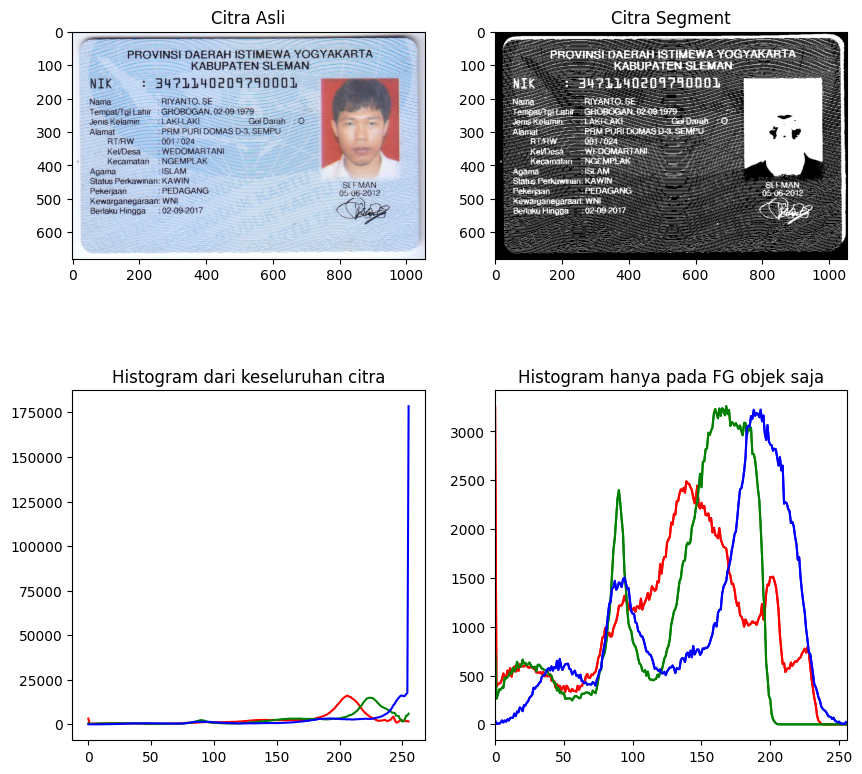

In [13]:
filename_3 = ('/content/drive/MyDrive/thres/ktp.jpg')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "ktp.jpg", munculkan hanya warna yang
biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


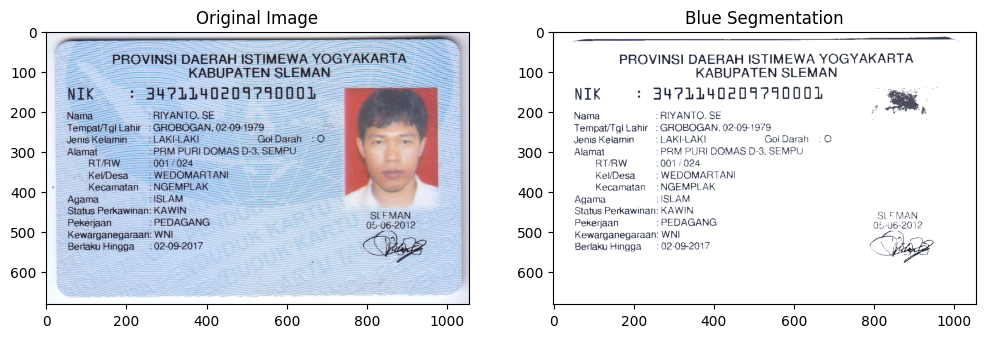

In [18]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/thres/ktp.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Define the number of clusters (in this case, for yellow color)
num_clusters = 5  # Adjust this value as needed

# Create the K-Means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the pixel data
kmeans.fit(pixels)

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Find the cluster that represents the yellow color
blue_cluster = None
min_distance = float('inf')

for i, color in enumerate(colors):
    # Define a reference blue color
    reference_blue = np.array([0, 0, 255], dtype=np.uint8)

    # Calculate the Euclidean distance between the color and reference_blue
    distance = np.linalg.norm(color - reference_blue)

    if distance < min_distance:
        min_distance = distance
        blue_cluster = i

# Create a mask for the blue cluster
blue_mask = (kmeans.labels_ == blue_cluster)

# Reshape the mask to match the image dimensions
blue_mask = blue_mask.reshape(image.shape[0], image.shape[1])

# Create a white background image
white_background = np.full_like(image, (255, 255, 255), dtype=np.uint8)

# Apply the mask to the white background
output_image = np.where(blue_mask[..., None], image, white_background)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)), plt.title('Blue Segmentation')
plt.show()